In [3]:
import pandas as pd
import numpy as np

In [2]:
import glob
import pandas as pd
path =r'/Users/ujash/Documents/IlabDatasets/Top200Companies'
filenames = glob.glob(path + "/*.csv")

dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename))

# Concatenate all data into one DataFrame
big_frame = pd.concat(dfs, ignore_index=True)

big_frame

from pandas import ExcelWriter

writer = ExcelWriter('PythonExport.xlsx')
big_frame.to_excel(writer,'Sheet5')
writer.save()

# DF TO CSV
big_frame.to_csv('PythonExport.csv', sep=',')

In [87]:
  df = pd.read_csv('/Users/ujash/Documents/Assignments/iLab1/JPM/PythonExport.csv')
df.head()  

/Users/ujash/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Sr. Number Abbreviations             Name  Adj Close    Close     Date  \
0           0           RSG  Resolute Mining   0.829964  0.87529  28/1/88   
1           1           RSG  Resolute Mining        NaN      NaN  31/1/88   
2           2           RSG  Resolute Mining        NaN      NaN   1/2/88   
3           3           RSG  Resolute Mining        NaN      NaN   2/2/88   
4           4           RSG  Resolute Mining        NaN      NaN   3/2/88   

      High      Low     Open Type  Volume  
0  0.87529  0.87529  0.87529  NaN     0.0  
1      NaN      NaN      NaN  NaN     NaN  
2      NaN      NaN      NaN  NaN     NaN  
3      NaN      NaN      NaN  NaN     NaN  
4      NaN      NaN      NaN  NaN     NaN

In [24]:
to_drop = ['High',
          'Low',
          'Open',]
df.drop(to_drop, inplace=True, axis=1)

/Users/ujash/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # This is added back by InteractiveShellApp.init_path()


In [88]:
df.head()

Sr. Number Abbreviations             Name  Adj Close    Close     Date  \
0           0           RSG  Resolute Mining   0.829964  0.87529  28/1/88   
1           1           RSG  Resolute Mining        NaN      NaN  31/1/88   
2           2           RSG  Resolute Mining        NaN      NaN   1/2/88   
3           3           RSG  Resolute Mining        NaN      NaN   2/2/88   
4           4           RSG  Resolute Mining        NaN      NaN   3/2/88   

      High      Low     Open Type  Volume  
0  0.87529  0.87529  0.87529  NaN     0.0  
1      NaN      NaN      NaN  NaN     NaN  
2      NaN      NaN      NaN  NaN     NaN  
3      NaN      NaN      NaN  NaN     NaN  
4      NaN      NaN      NaN  NaN     NaN

In [89]:
df.loc[85500]


Sr. Number                     85500
Abbreviations                    OSH
Name             Oil Search Limited 
Adj Close                   0.584682
Close                           0.75
Date                         24/9/02
High                            0.76
Low                             0.73
Open                            0.74
Type                             NaN
Volume                   3.23416e+06
Name: 85500, dtype: object

In [62]:
df.head()

Sr. Number Abbreviations             Name  Adj Close    Close     Date  \
0           0           RSG  Resolute Mining   0.829964  0.87529  28/1/88   
1           1           RSG  Resolute Mining        NaN      NaN  31/1/88   
2           2           RSG  Resolute Mining        NaN      NaN   1/2/88   
3           3           RSG  Resolute Mining        NaN      NaN   2/2/88   
4           4           RSG  Resolute Mining        NaN      NaN   3/2/88   

      High      Low     Open Type  Volume  
0  0.87529  0.87529  0.87529  NaN     0.0  
1      NaN      NaN      NaN  NaN     NaN  
2      NaN      NaN      NaN  NaN     NaN  
3      NaN      NaN      NaN  NaN     NaN  
4      NaN      NaN      NaN  NaN     NaN

In [27]:
# location
df.loc[85500]

Unnamed: 0                     85500
 Name                            NaN
Unnamed: 2                       NaN
Abbreviations                    NaN
Adj Close                   0.584682
Close                           0.75
Date                         24/9/02
High                            0.76
Low                             0.73
Name             Oil Search Limited 
Open                            0.74
Unnamed: 9                       NaN
Volume                   3.23416e+06
abbreviations                    OSH
Name: 85500, dtype: object

In [90]:
# datatype
df.get_dtype_counts()

float64    6
int64      1
object     4
dtype: int64

In [39]:
extr = df['Date'].str.extract(r'^(\d{2})', expand=False)
# The regular expression above is meant to find any four digits at the beginning of a string, which suffices for our case. The above is a raw string (meaning that a backslash is no longer an escape character), which is standard practice with regular expressions.

In [92]:
# to check null values
df.isnull()

#null values count - 169967
df.isnull().sum()






Sr. Number            0
Abbreviations         0
Name                  1
Adj Close        169967
Close            169967
Date                  0
High             169967
Low              169967
Open             169967
Type             873936
Volume           169967
dtype: int64

In [93]:
import matplotlib
import missingno as msno
%matplotlib inline

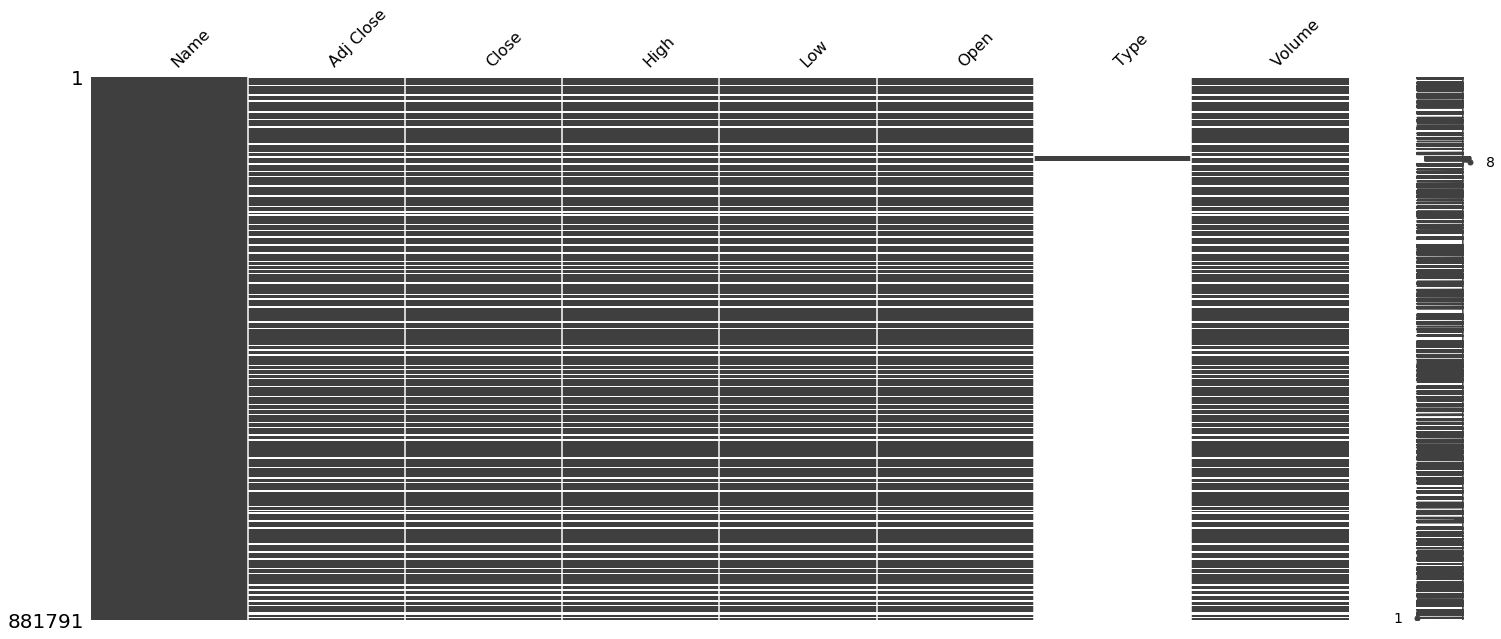

In [94]:
missingdata_df = df.columns[df.isnull().any()].tolist()
msno.matrix(df[missingdata_df])

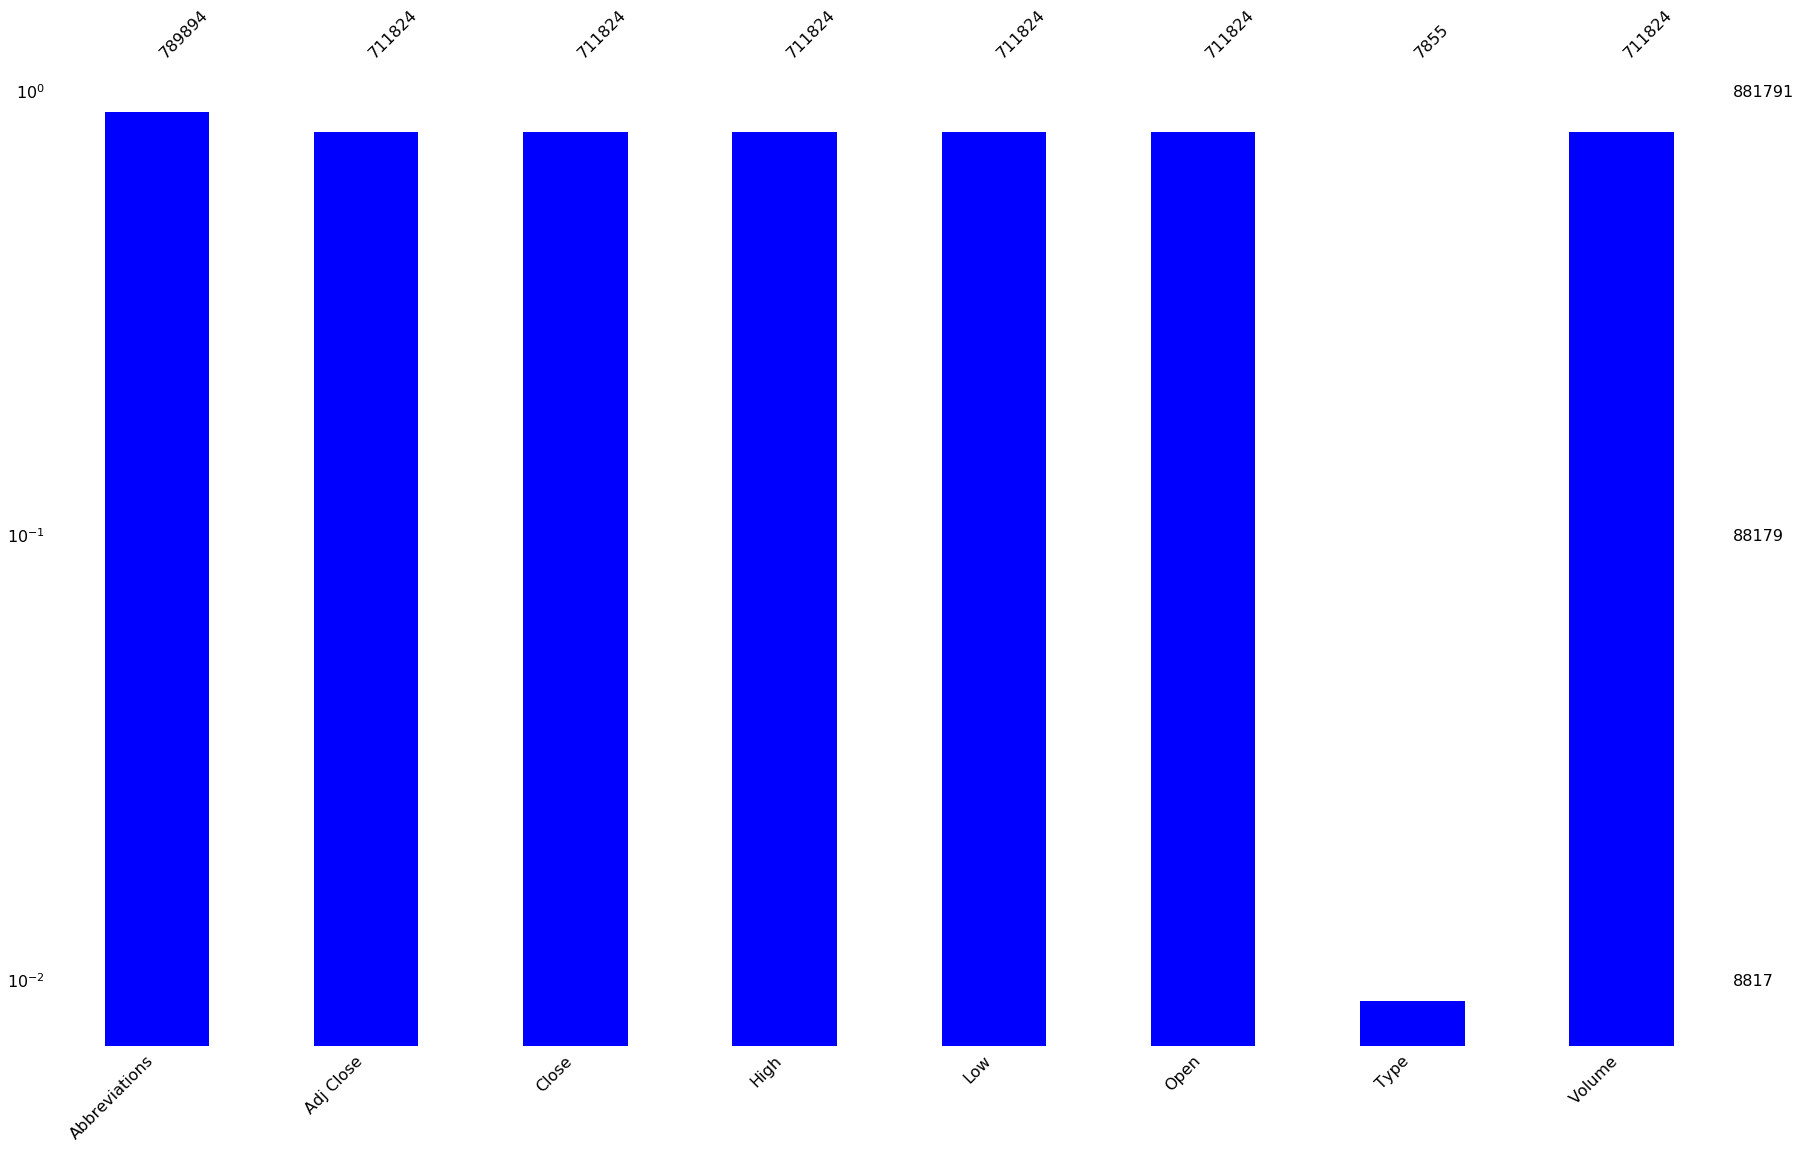

In [47]:
# msmo bar graph describe the missing values in dataset
msno.bar(df[missingdata_df], color="blue", log=True, figsize=(30,18))

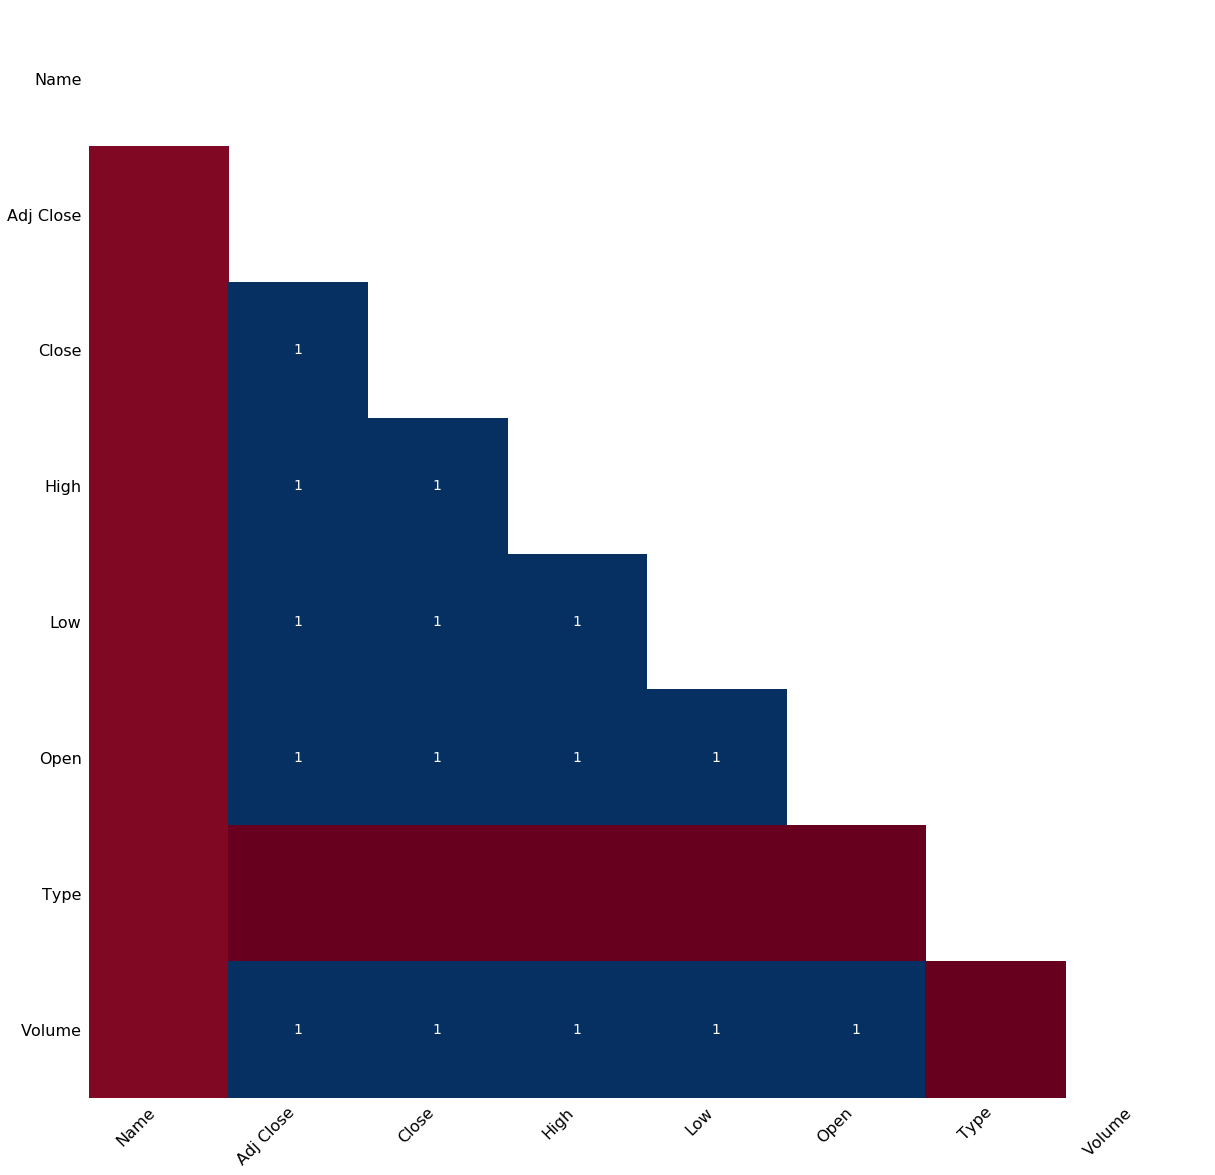

In [95]:
# heatmap describe the degree of nullity relationship between the different features
msno.heatmap(df[missingdata_df], figsize=(20,20))

In [35]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 16

In [36]:
import warnings
import itertools
warnings.filterwarnings("ignore")

In [43]:
df = pd.read_csv("/Users/ujash/Downloads/RSG.AX.csv")
df.index.name=None
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 9 columns):
Date            230 non-null object
Open            230 non-null float64
High            230 non-null float64
Low             230 non-null float64
Close           230 non-null float64
Adj Close       230 non-null float64
Volume          230 non-null int64
Abbravaition    230 non-null object
Name            230 non-null object
dtypes: float64(5), int64(1), object(3)
memory usage: 16.2+ KB


In [45]:
df.head(15)


Date     Open     High      Low    Close  Adj Close    Volume  \
0   30/06/1999  3.63244  3.63244  2.62586  2.88844   2.738866  10890853   
1   31/07/1999  2.88844  2.89720  2.45080  2.49456   2.365383   5741940   
2   31/08/1999  2.58209  3.32609  2.23198  2.84468   2.697372   9684497   
3   30/09/1999  2.84468  3.19479  2.23198  2.36327   2.240891   6945740   
4   31/10/1999  2.40704  2.40704  1.83810  2.03504   1.929658   5375967   
5   30/11/1999  2.05692  2.05692  1.64116  1.70681   1.618425   3075699   
6   31/12/1999  1.66304  1.75057  0.91905  1.18164   1.120450   8134648   
7   31/01/2000  1.22540  1.35669  1.05034  1.09411   1.037453   6245699   
8   29/02/2000  1.09411  1.15975  0.87529  0.94093   0.892205   2913810   
9   31/03/2000  0.94093  0.94093  0.65646  0.91905   0.871458   2264017   
10  30/04/2000  0.89717  0.89717  0.58644  0.58644   0.556072   3244606   
11  31/05/2000  0.63458  0.67835  0.45952  0.59082   0.560225   7487060   
12  30/06/2000  0.59082  0.83152  0.56894  0.67835   0.643223   4325374   
13  31/07/2000  0.65646  0.83152  0.64771  0.67835   0.643223   3473985   
14  31/08/2000  0.70023  0.72211  0.59082  0.61270   0.580972   1691430   

   Abbravaition             Name  
0           RSG  Resolute Mining  
1           RSG  Resolute Mining  
2           RSG  Resolute Mining  
3           RSG  Resolute Mining  
4           RSG  Resolute Mining  
5           RSG  Resolute Mining  
6           RSG  Resolute Mining  
7           RSG  Resolute Mining  
8           RSG  Resolute Mining  
9           RSG  Resolute Mining  
10          RSG  Resolute Mining  
11          RSG  Resolute Mining  
12          RSG  Resolute Mining  
13          RSG  Resolute Mining  
14          RSG  Resolute Mining

In [46]:
ts = df[pd.Series(pd.to_datetime(df.index, errors='coerce')).notnull().values]
ts.head(15)

Date     Open     High      Low    Close  Adj Close    Volume  \
0   30/06/1999  3.63244  3.63244  2.62586  2.88844   2.738866  10890853   
1   31/07/1999  2.88844  2.89720  2.45080  2.49456   2.365383   5741940   
2   31/08/1999  2.58209  3.32609  2.23198  2.84468   2.697372   9684497   
3   30/09/1999  2.84468  3.19479  2.23198  2.36327   2.240891   6945740   
4   31/10/1999  2.40704  2.40704  1.83810  2.03504   1.929658   5375967   
5   30/11/1999  2.05692  2.05692  1.64116  1.70681   1.618425   3075699   
6   31/12/1999  1.66304  1.75057  0.91905  1.18164   1.120450   8134648   
7   31/01/2000  1.22540  1.35669  1.05034  1.09411   1.037453   6245699   
8   29/02/2000  1.09411  1.15975  0.87529  0.94093   0.892205   2913810   
9   31/03/2000  0.94093  0.94093  0.65646  0.91905   0.871458   2264017   
10  30/04/2000  0.89717  0.89717  0.58644  0.58644   0.556072   3244606   
11  31/05/2000  0.63458  0.67835  0.45952  0.59082   0.560225   7487060   
12  30/06/2000  0.59082  0.83152  0.56894  0.67835   0.643223   4325374   
13  31/07/2000  0.65646  0.83152  0.64771  0.67835   0.643223   3473985   
14  31/08/2000  0.70023  0.72211  0.59082  0.61270   0.580972   1691430   

   Abbravaition             Name  
0           RSG  Resolute Mining  
1           RSG  Resolute Mining  
2           RSG  Resolute Mining  
3           RSG  Resolute Mining  
4           RSG  Resolute Mining  
5           RSG  Resolute Mining  
6           RSG  Resolute Mining  
7           RSG  Resolute Mining  
8           RSG  Resolute Mining  
9           RSG  Resolute Mining  
10          RSG  Resolute Mining  
11          RSG  Resolute Mining  
12          RSG  Resolute Mining  
13          RSG  Resolute Mining  
14          RSG  Resolute Mining

In [47]:
ts.dtypes

Date             object
Open            float64
High            float64
Low             float64
Close           float64
Adj Close       float64
Volume            int64
Abbravaition     object
Name             object
dtype: object

In [49]:
ts['Close'] = pd.to_numeric(ts['Close'] , errors='coerce')
ts.head()

Date     Open     High      Low    Close  Adj Close    Volume  \
0  30/06/1999  3.63244  3.63244  2.62586  2.88844   2.738866  10890853   
1  31/07/1999  2.88844  2.89720  2.45080  2.49456   2.365383   5741940   
2  31/08/1999  2.58209  3.32609  2.23198  2.84468   2.697372   9684497   
3  30/09/1999  2.84468  3.19479  2.23198  2.36327   2.240891   6945740   
4  31/10/1999  2.40704  2.40704  1.83810  2.03504   1.929658   5375967   

  Abbravaition             Name  
0          RSG  Resolute Mining  
1          RSG  Resolute Mining  
2          RSG  Resolute Mining  
3          RSG  Resolute Mining  
4          RSG  Resolute Mining

In [50]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230 entries, 0 to 229
Data columns (total 9 columns):
Date            230 non-null object
Open            230 non-null float64
High            230 non-null float64
Low             230 non-null float64
Close           230 non-null float64
Adj Close       230 non-null float64
Volume          230 non-null int64
Abbravaition    230 non-null object
Name            230 non-null object
dtypes: float64(5), int64(1), object(3)
memory usage: 18.0+ KB


In [52]:
ts.dropna(inplace = True)

In [53]:
Stock_Price = ts.groupby('Close')
Stock_Price.head()

Date     Open     High      Low    Close  Adj Close     Volume  \
0    30/06/1999  3.63244  3.63244  2.62586  2.88844   2.738866   10890853   
1    31/07/1999  2.88844  2.89720  2.45080  2.49456   2.365383    5741940   
2    31/08/1999  2.58209  3.32609  2.23198  2.84468   2.697372    9684497   
3    30/09/1999  2.84468  3.19479  2.23198  2.36327   2.240891    6945740   
4    31/10/1999  2.40704  2.40704  1.83810  2.03504   1.929658    5375967   
5    30/11/1999  2.05692  2.05692  1.64116  1.70681   1.618425    3075699   
6    31/12/1999  1.66304  1.75057  0.91905  1.18164   1.120450    8134648   
7    31/01/2000  1.22540  1.35669  1.05034  1.09411   1.037453    6245699   
8    29/02/2000  1.09411  1.15975  0.87529  0.94093   0.892205    2913810   
9    31/03/2000  0.94093  0.94093  0.65646  0.91905   0.871458    2264017   
10   30/04/2000  0.89717  0.89717  0.58644  0.58644   0.556072    3244606   
11   31/05/2000  0.63458  0.67835  0.45952  0.59082   0.560225    7487060   
12   30/06/2000  0.59082  0.83152  0.56894  0.67835   0.643223    4325374   
13   31/07/2000  0.65646  0.83152  0.64771  0.67835   0.643223    3473985   
14   31/08/2000  0.70023  0.72211  0.59082  0.61270   0.580972    1691430   
15   30/09/2000  0.61270  0.72211  0.54705  0.56894   0.539478    2509510   
16   31/10/2000  0.56894  0.61270  0.48141  0.50329   0.477228    1904483   
17   30/11/2000  0.50329  0.52517  0.37200  0.37637   0.356880    1786613   
18   31/12/2000  0.38075  0.54705  0.38075  0.50329   0.477228    1983884   
19   31/01/2001  0.50329  0.52517  0.40263  0.43764   0.414977    1298907   
20   28/02/2001  0.42014  0.48141  0.38075  0.38075   0.361033    1710151   
21   31/03/2001  0.38950  0.43764  0.37637  0.39825   0.377627    1897549   
22   30/04/2001  0.39825  0.61270  0.38513  0.41576   0.394230    3490250   
23   31/05/2001  0.41576  0.45952  0.38513  0.40701   0.385934    3773629   
24   30/06/2001  0.40701  0.42014  0.30635  0.34136   0.323683    1799283   
25   31/07/2001  0.33698  0.39388  0.30635  0.30635   0.290486    2450741   
26   31/08/2001  0.32823  0.37637  0.29760  0.33261   0.315386    1792325   
27   30/09/2001  0.33261  0.49016  0.33261  0.48141   0.456481   10536412   
28   31/10/2001  0.47265  0.48141  0.39388  0.42889   0.406680    4132859   
29   30/11/2001  0.42889  0.42889  0.38513  0.38513   0.365187    1885906   
..          ...      ...      ...      ...      ...        ...        ...   
200  29/02/2016  0.59000  0.66000  0.50000  0.54000   0.525583   86670205   
201  31/03/2016  0.54500  0.98500  0.52700  0.97500   0.948969   62738402   
202  30/04/2016  1.03000  1.04500  0.76500  0.89000   0.866238   81042915   
203  31/05/2016  0.92000  1.38500  0.91500  1.28500   1.250692  117264176   
204  30/06/2016  1.30000  1.68000  1.30000  1.66500   1.620547   93915997   
205  31/07/2016  1.75000  2.10000  1.71000  1.77000   1.722744  122004757   
206  31/08/2016  1.77000  2.35000  1.73500  1.97000   1.917404  286153351   
207  30/09/2016  1.98000  1.98000  1.50500  1.50500   1.476604  143919301   
208  31/10/2016  1.52000  1.75700  1.15500  1.23500   1.211698  181186381   
209  30/11/2016  1.19000  1.34500  0.94000  1.30000   1.275472  155513088   
210  31/12/2016  1.30000  1.53000  1.20000  1.45500   1.427547  139238123   
211  31/01/2017  1.50000  1.91250  1.46000  1.61000   1.579623  142287985   
212  28/02/2017  1.61000  1.62500  1.25200  1.30000   1.275472  224857990   
213  31/03/2017  1.30500  1.44000  1.14000  1.21500   1.192075  191478569   
214  30/04/2017  1.23000  1.28250  1.09000  1.16000   1.138113  189376396   
215  31/05/2017  1.16000  1.37500  1.12500  1.19000   1.167547  206378032   
216  30/06/2017  1.19500  1.22000  1.02000  1.07000   1.049811  151596202   
217  31/07/2017  1.07000  1.22000  1.03000  1.21000   1.187170  159091709   
218  31/08/2017  1.23500  1.29500  1.02000  1.03000   1.010566  146266663   
219  30/09/2017  1.05000  1.10000  1.01000  1.03000   1.030000  100170106   
220  31

In [82]:
import matplotlib.pyplot as plt
plt.plot(df.index, df['Close'])
plt.title('RSG Stock Price')
plt.ylabel('Price ($)');
plt.show()




AttributeError: Cannot access attribute 'index' of 'DataFrameGroupBy' objects, try using the 'apply' method

In [76]:
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

In [79]:
def TestStationaryPlot(ts):
    rol_mean = ts.rolling(window = 12, center = False).mean()
    rol_std = ts.rolling(window = 12, center = False).std()
    
    plt.plot(ts, color = 'blue',label = 'Original Data')
    plt.plot(rol_mean, color = 'red', label = 'Rolling Mean')
    plt.plot(rol_std, color ='black', label = 'Rolling Std')
    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 25)
    
    plt.xlabel('Time in Years', fontsize = 25)
    plt.ylabel('Total Emissions', fontsize = 25)
    plt.legend(loc='best', fontsize = 25)
    plt.title('Rolling Mean & Standard Deviation', fontsize = 25)
    plt.show(block= True)

In [80]:
def TestStationaryAdfuller(ts, cutoff = 0.01):
    ts_test = adfuller(ts, autolag = 'AIC')
    ts_test_output = pd.Series(ts_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    for key,value in ts_test[4].items():
        ts_test_output['Critical Value (%s)'%key] = value
    print(ts_test_output)
    
    if ts_test[1] <= cutoff:
        print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [83]:

TestStationaryPlot(df)

TypeError: cannot handle this type -> object

In [96]:
RSG_TS = RSG.set_index('Date')


In [142]:
# Training and test data
train_start = 0
train_end = int(np.floor(0.8*n))
test_start = train_end
test_end = n
data_train = data[np.arange(train_start, train_end), :]
data_test = data[np.arange(test_start, test_end), :]